In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats

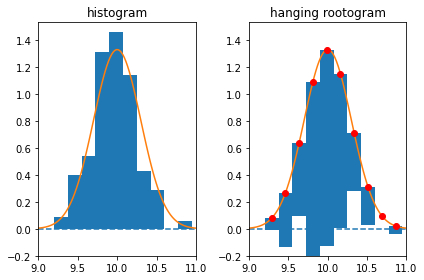

In [2]:


fig, ax = plt.subplots(1, 2)
mu = 10
sig = 0.3
my_data = np.random.normal(mu, sig, 200)
x = np.linspace(9, 11, 100)

# I plot the data twice, one for the histogram only for comparison,
# and one for the rootogram.
# The trick will be to modify the histogram to make it hang to
# the expected distribution curve:

for a in ax:
    a.hist(my_data, density=True) # normed=True is deprecated
    a.plot(x, scipy.stats.norm.pdf(x, mu, sig))
    # a.plot(x, mlab.np.(x, mu, sig))
    a.set_ylim(-0.2)
    a.set_xlim(9, 11)
    a.hlines(0, 9, 11, linestyle="--")

for rectangle in ax[1].patches:

    # expected value in the middle of the bar
    exp = scipy.stats.norm.pdf(rectangle.get_x() + rectangle.get_width()/2., mu, sig)

    # difference to the expected value
    diff = exp - rectangle.get_height()
    rectangle.set_y(diff)

    ax[1].plot(rectangle.get_x() + rectangle.get_width()/2., exp, "ro")

ax[0].set_title("histogram")
ax[1].set_title("hanging rootogram")
plt.tight_layout()